### Importing and building the plotting functions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 20)
plt.style.use('fivethirtyeight')
# plt.style.use('seaborn')

In [3]:
def plotter(DF, name, xlabel= 'Date', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8# if col in Countries else 0.4
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel(xlabel)
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [4]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
#     plt.ylim(bottom=0.05, top=2*10**4)
    
    columns = DF.columns if col == 'all' else Countries[::-1]
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = ':' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.4
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [5]:
def stackplotter(DF, name, tail=None):
    plt.figure(figsize = (14, 7))
    
    if tail:
        DF = DF.tail(tail)
    columns = Countries[::-1]
    columns = [t for t in columns if 'World' not in t][::-1]
    
    plt.stackplot(DF.index, 
                  DF[['World']].T, 
                  labels=['World'], 
                  colors=['blue'], 
                  alpha=0.2,                 
                 )
    
    plt.stackplot(DF.index, 
                  DF[columns].T, 
                  labels=columns, 
                  colors=[colors[c] for c in columns], 
                  alpha=0.8,                 
                 )
    
    
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

### Importing the Data from Johns Hopkins data

In [6]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [7]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Deaths = DF.copy()

In [8]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DF = pd.read_csv(data_url)

In [9]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea', 'Country/Region': 'Date'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')
# DF.index.rename('Date', inplace = True)

Confirmed = DF.copy()

In [10]:
colors = {'India': 'Blue', 
          'World': 'Blue', 
          'US': 'Black', 
          'Brazil': 'darkgreen', 
          'Mexico': 'Orange', 
          'UK': 'Purple', 
          'Italy': 'grey', 
          'Russia': 'cyan', 
          'France': 'violet', 
          'Germany': 'lime', 
          'Spain': 'teal',
          'Colombia': 'lightgreen', 
#           'Argentina': 'Teal',
          'Iran': 'brown', 
          'China': 'red', 
          'Peru': 'yellow'
         }

Countries = list(colors.keys())

### Deaths

In [11]:
Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-26,447194,4748342,688041,594443,275450,136529,130697,200245,117182,93409,86229,126145,119360,4849,199292
2021-09-27,447373,4756138,690435,594653,275676,136569,130742,201015,117281,93509,86298,126178,119649,4849,199314
2021-09-28,447751,4765120,692592,595446,276376,136746,130807,201854,117348,93576,86358,126219,119888,4849,199329
2021-09-29,448062,4774181,695123,596122,276973,136906,130870,202700,117407,93643,86397,126261,120160,4849,199367
2021-09-30,448339,4782950,697851,596749,277507,137043,130921,203549,117474,93715,86415,126299,120428,4849,199367


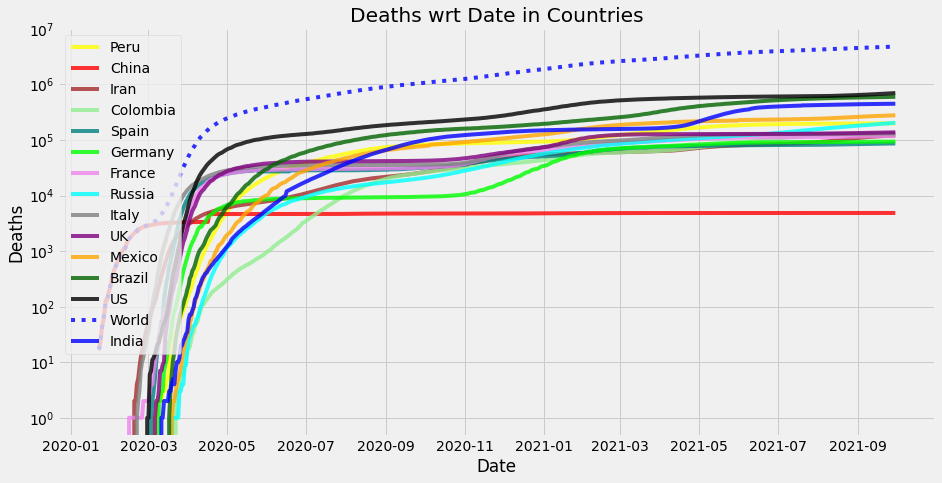

In [12]:
plotter(Deaths, 'Deaths')

### Confirmed Cases

In [13]:
Daily_Confirmed = np.round((Confirmed - Confirmed.shift(1))/1)
Daily_Confirmed = Daily_Confirmed.fillna(0).astype('int')
Daily_Confirmed[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-26,26041,330987,30958,8668,13685,33068,3099,22015,4932,5271,0,1422,13792,43,773
2021-09-27,18795,488011,185016,14423,3007,37583,1773,21731,1503,4798,5039,1015,14470,35,320
2021-09-28,18870,447089,109605,15395,9792,34847,2962,21040,7224,7409,2290,1686,11701,42,865
2021-09-29,23529,472876,123267,17756,9796,35266,3212,21891,6238,12267,2761,1472,13271,27,1086
2021-09-30,26727,485039,110594,27527,8828,35833,4094,23330,5456,10999,2400,1429,14078,37,0


In [14]:
Confirmed_EWM = np.round(Daily_Confirmed.ewm(com=14).mean().astype(int))
Confirmed_EWM[Countries].tail()

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-26,32490,528522,129206,23374,10707,32743,4485,19589,9688,8352,4313,2087,20976,50,927
2021-09-27,31577,525822,132926,22777,10193,33065,4305,19731,9142,8115,4361,2016,20542,49,886
2021-09-28,30730,520573,131372,22285,10166,33184,4215,19819,9014,8068,4223,1994,19953,48,885
2021-09-29,30250,517393,130831,21983,10142,33323,4148,19957,8829,8348,4125,1959,19507,47,898
2021-09-30,30015,515236,129482,22353,10054,33490,4144,20182,8604,8525,4010,1924,19145,46,838


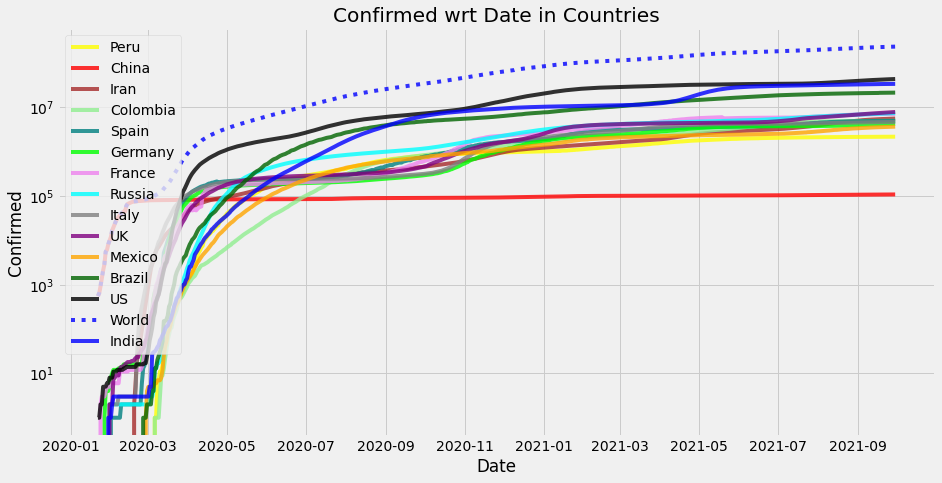

In [15]:
plotter(Confirmed, 'Confirmed')

### Daily Deaths

In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-26,276,5139,286,243,747,64,44,795,25,11,0,43,278,0,64
2021-09-27,179,7796,2394,210,226,40,45,770,99,100,69,33,289,0,22
2021-09-28,378,8982,2157,793,700,177,65,839,67,67,60,41,239,0,15
2021-09-29,311,9061,2531,676,597,160,63,846,59,67,39,42,272,0,38
2021-09-30,277,8769,2728,627,534,137,51,849,67,72,18,38,268,0,0


### Exponential Weighted Mean

In [17]:
EWM = np.round(Daily_Deaths.ewm(com=7).mean(), 2)
name = 'Exponential Weighted Mean Weekly'

Weekly_Avg = np.round((Deaths - Deaths.shift(7))/7, 2)
# name = 'Weekly Average Deaths'

AVG = EWM 
# AVG = Weekly_Avg
AVG[Countries].tail(5)

Country/Region,India,World,US,Brazil,Mexico,UK,Italy,Russia,France,Germany,Spain,Colombia,Iran,China,Peru
2021-09-26,304.38,8018.32,1734.16,533.52,563.30,137.08,54.18,787.67,69.75,48.49,56.82,40.39,364.22,0.02,41.04
2021-09-27,288.70,7990.53,1816.64,493.08,521.14,124.95,53.04,785.46,73.41,54.93,58.34,39.47,354.82,0.02,38.66
2021-09-28,299.87,8114.47,1859.18,530.57,543.50,131.46,54.53,792.15,72.61,56.44,58.55,39.66,340.34,0.02,35.70
2021-09-29,301.26,8232.78,1943.16,548.75,550.19,135.02,55.59,798.89,70.91,57.76,56.10,39.95,331.80,0.01,35.99
2021-09-30,298.23,8299.81,2041.27,558.53,548.16,135.27,55.02,805.15,70.42,59.54,51.34,39.71,323.83,0.01,31.49


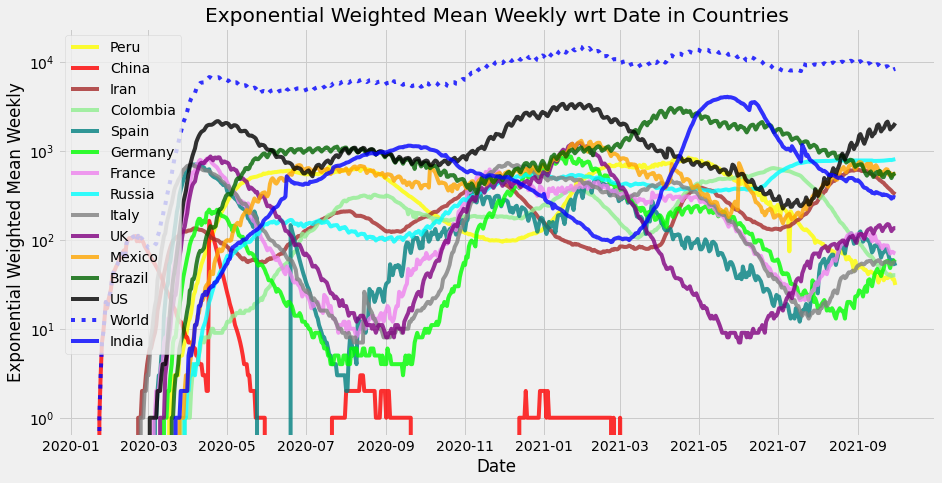

In [18]:
plotter(np.round(AVG), name)

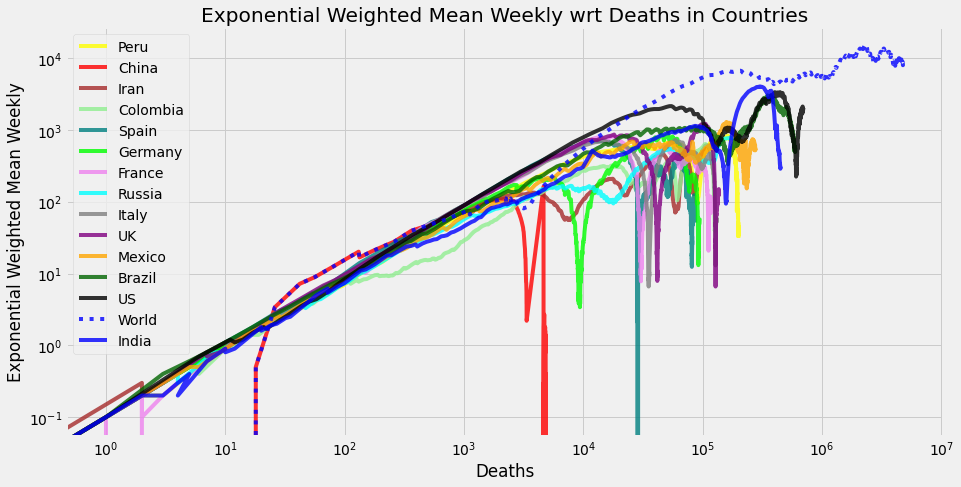

In [19]:
plotwrtDeaths(np.round(AVG, 1), name, Deaths)

### Stack Plots

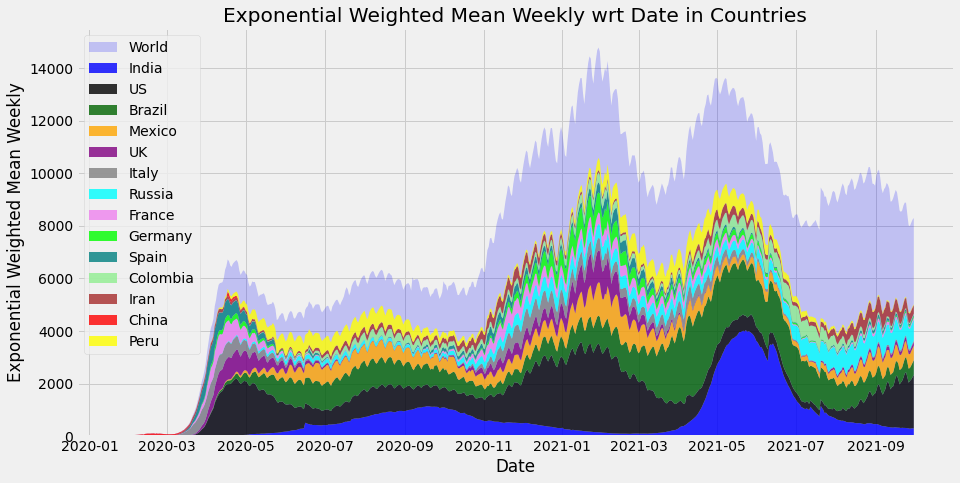

In [20]:
stackplotter(AVG, name)

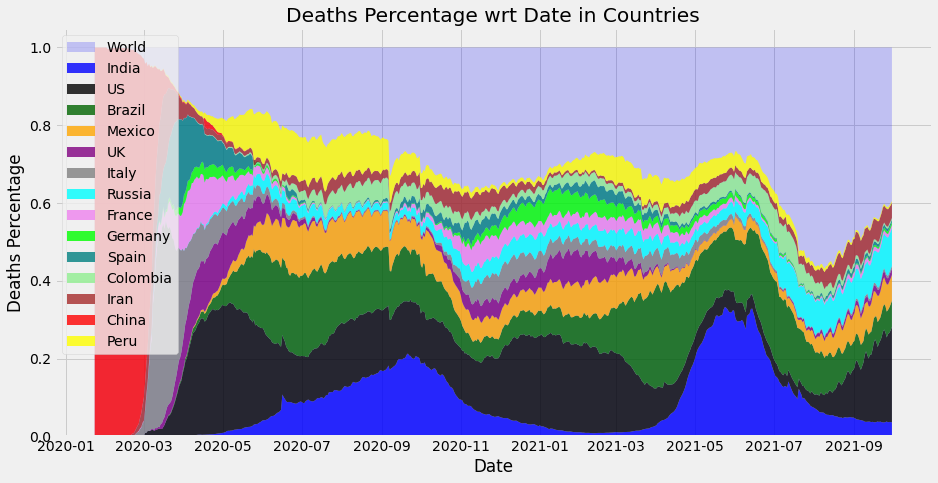

In [21]:
stackplotter(AVG.divide(AVG.World, axis=0), 'Deaths Percentage')

### Reproductivity

In [22]:
Reproductivity = np.round(EWM/EWM.shift(14), 4).clip(lower= 0.1)
Reproductivity[EWM.shift(14) < 12] = 1

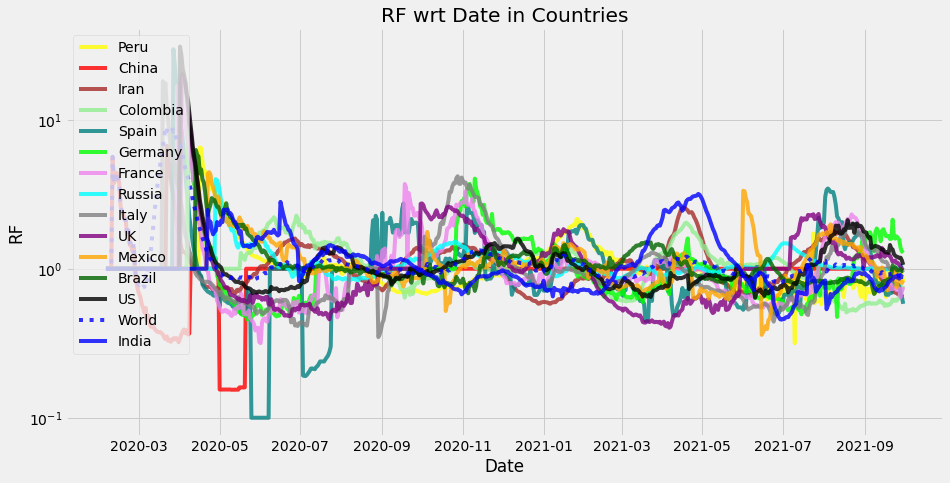

In [23]:
plotter(Reproductivity, 'RF')

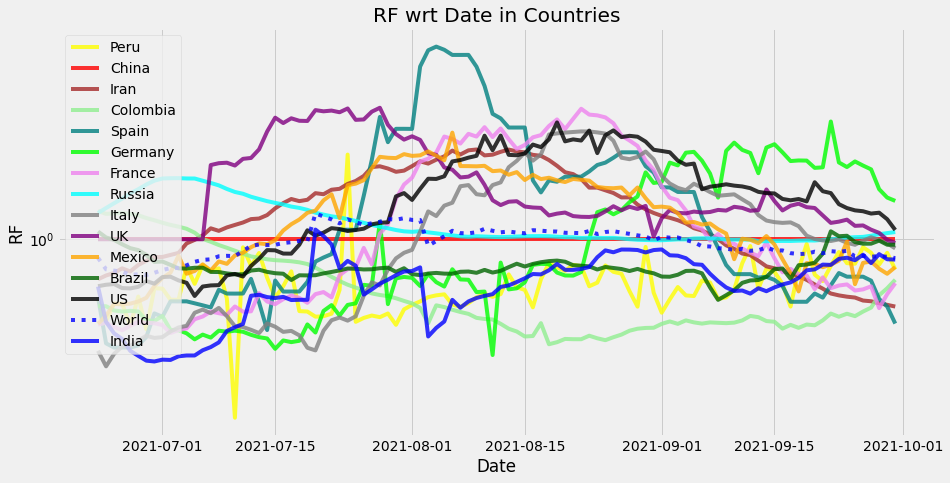

In [24]:
plotter(Reproductivity.tail(100), 'RF')

### Test rate

In [25]:
# We take the mortality to be 0.5%

mortality = 0.005

Testrate = np.round(Confirmed_EWM/(EWM/mortality), 3)
Testrate[EWM < 12] = None

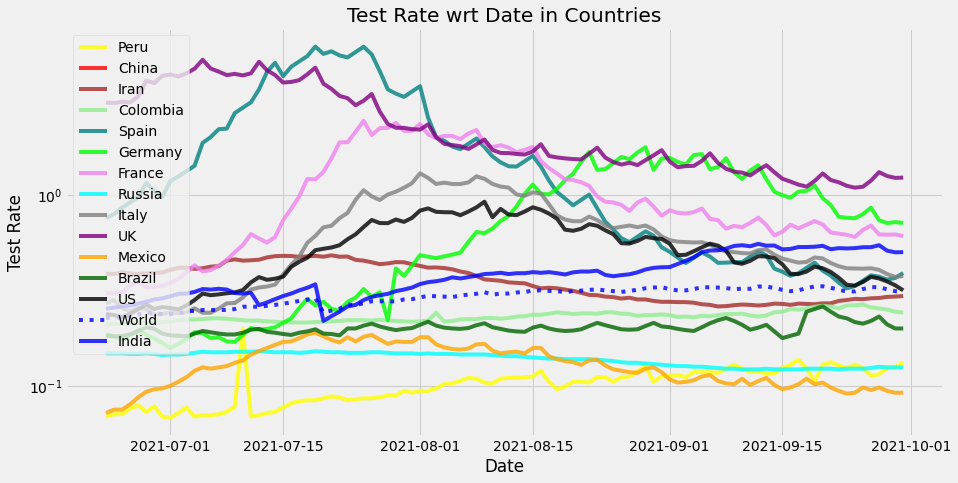

In [26]:
plotter(Testrate.tail(100), 'Test Rate', scale= 'log')

### Time Adjusted for starting day

In [27]:
def adjust_days(DF):
    X = DF.copy()
#     X.reset_index()
    for col in DF.columns:
        L = list(DF[Deaths[col]>5][col])
        X[col] = L + [None for _ in range(len(X[col]) - len(L))]
    return X.reset_index()[DF.columns]
xlabel= 'Days from 5 Deaths'

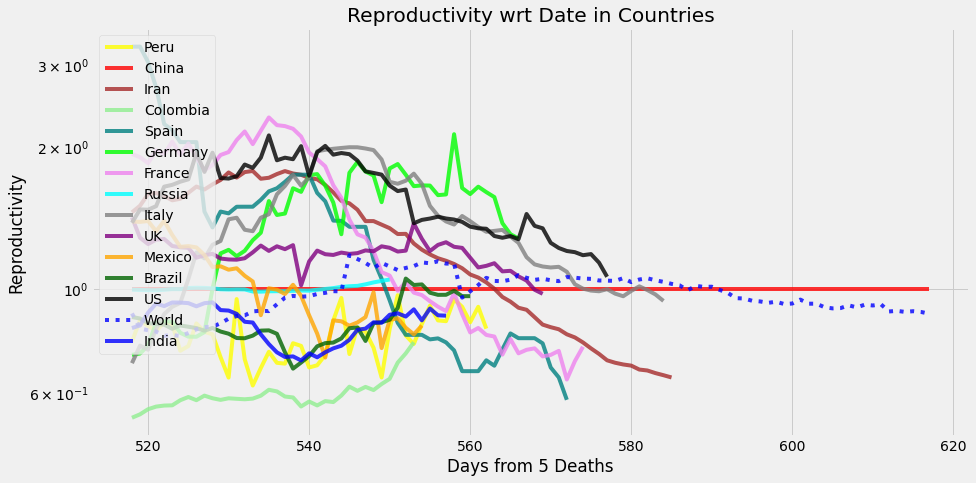

In [28]:
RF_A = adjust_days(Reproductivity)
plotter(RF_A.tail(100), 'Reproductivity', xlabel)

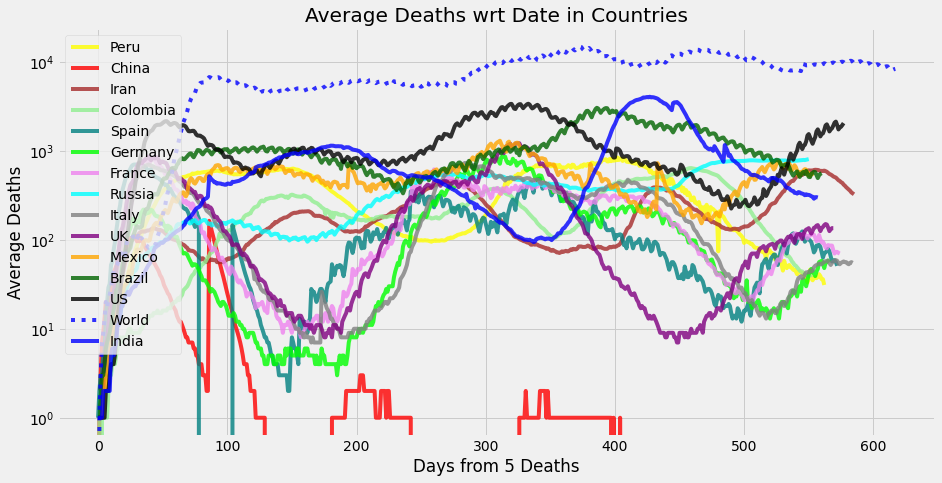

In [29]:
AVG_A = adjust_days(AVG)
plotter(np.round(AVG_A), 'Average Deaths', xlabel)

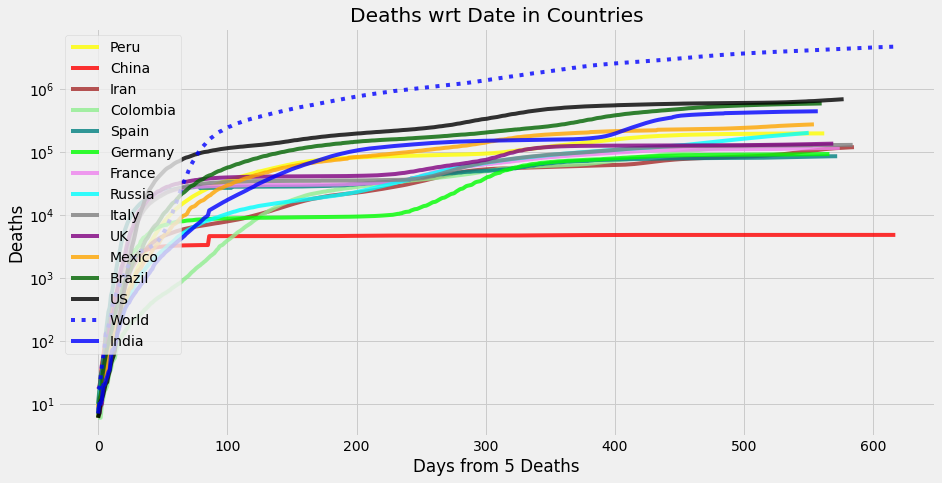

In [30]:
Deaths_A = adjust_days(Deaths)
plotter(Deaths_A, 'Deaths', xlabel)

### Today's Statistics by combining the previous tables

In [31]:
LastDay_DF = pd.DataFrame()
LastDay_DF['Country'] = Deaths.columns
LastDay_DF = LastDay_DF.set_index('Country')

D = {
    'Deaths':Deaths,
    'Daily_Deaths':Daily_Deaths,
    'Weekly_Deaths': Weekly_Avg,
    'EWM7': EWM,
    'Reproductivity':Reproductivity,
    'Confirmed': Confirmed, 
    'Testrate': Testrate,
    'Confirmed_EWM': Confirmed_EWM
    }
for name in D:
    LastDay_DF[name] = D[name].iloc[-1]
LastDay_DF['Estimated(M)'] = np.round((LastDay_DF.Deaths/mortality)/1000000, 2)

In [32]:
LastDay_DF.sort_values('Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4782950,8769,7695.57,8299.81,0.8861,233742102,0.310,515236,956.59
US,697851,2728,1895.71,2041.27,1.0618,43460343,0.317,129482,139.57
Brazil,596749,627,540.71,558.53,0.9657,21427073,0.200,22353,119.35
India,448339,277,281.57,298.23,0.8777,33766707,0.503,30015,89.67
Mexico,277507,534,481.14,548.16,0.8363,3664223,0.092,10054,55.50
Russia,203549,849,816.43,805.15,1.0477,7401104,0.125,20182,40.71
Peru,199367,0,30.14,31.49,0.8237,2175305,0.133,838,39.87
Indonesia,141939,113,117.86,174.18,0.4233,4215104,0.150,5225,28.39
UK,137043,137,126.71,135.27,0.9770,7843887,1.238,33490,27.41


In [33]:
LastDay_DF.sort_values('Weekly_Deaths', ascending = False).head(12)

,Deaths,Daily_Deaths,Weekly_Deaths,EWM7,Reproductivity,Confirmed,Testrate,Confirmed_EWM,Estimated(M)
Country,,,,,,,,,
World,4782950,8769,7695.57,8299.81,0.8861,233742102,0.310,515236,956.59
US,697851,2728,1895.71,2041.27,1.0618,43460343,0.317,129482,139.57
Russia,203549,849,816.43,805.15,1.0477,7401104,0.125,20182,40.71
Brazil,596749,627,540.71,558.53,0.9657,21427073,0.200,22353,119.35
Mexico,277507,534,481.14,548.16,0.8363,3664223,0.092,10054,55.50
India,448339,277,281.57,298.23,0.8777,33766707,0.503,30015,89.67
Iran,120428,268,274.29,323.83,0.6486,5587040,0.296,19145,24.09
Malaysia,26335,192,236.29,273.37,0.7468,2245695,0.288,15725,5.27
Turkey,63827,216,186.14,202.87,0.8034,7124654,0.591,23984,12.77


### Pie Chart

In [34]:
def piechart(name='Deaths', size=12, DF=LastDay_DF):
    plt.figure(figsize = (size, size))
    DF = DF.sort_values(name, ascending = False)
    
    countries = DF.index[1:]
    deaths = DF[name][1:].clip(0, None)
    
    print ('World total: ',int( DF.loc['World'][name]))
    
    plt.pie(deaths, 
            labels= [c +' '+ str(d) for c, d in zip(countries, deaths)], 
            startangle=90,
            counterclock=False,
            autopct='%1.f%%', 
#             pctdistance=0.8
           )
    
    plt.title(name+' piechart for every country')

World total:  4782950


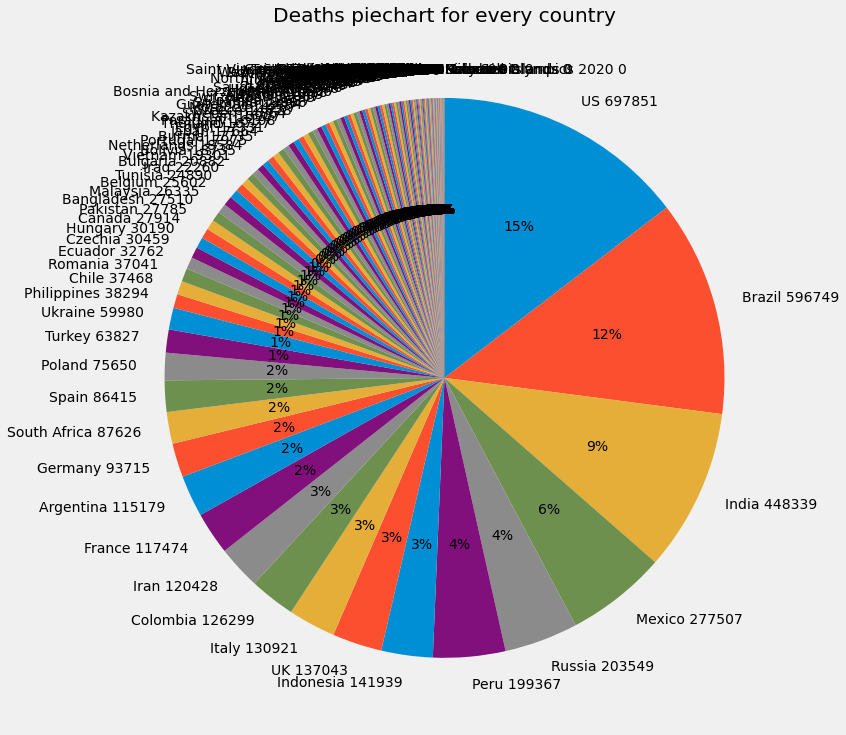

In [35]:
piechart('Deaths')

World total:  7695


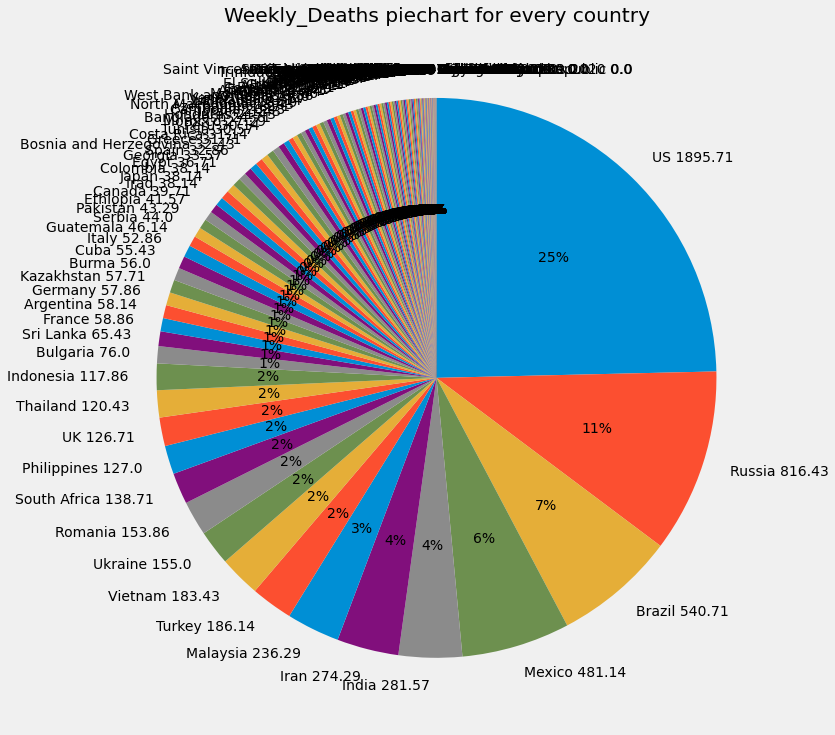

In [36]:
piechart('Weekly_Deaths')

World total:  8769


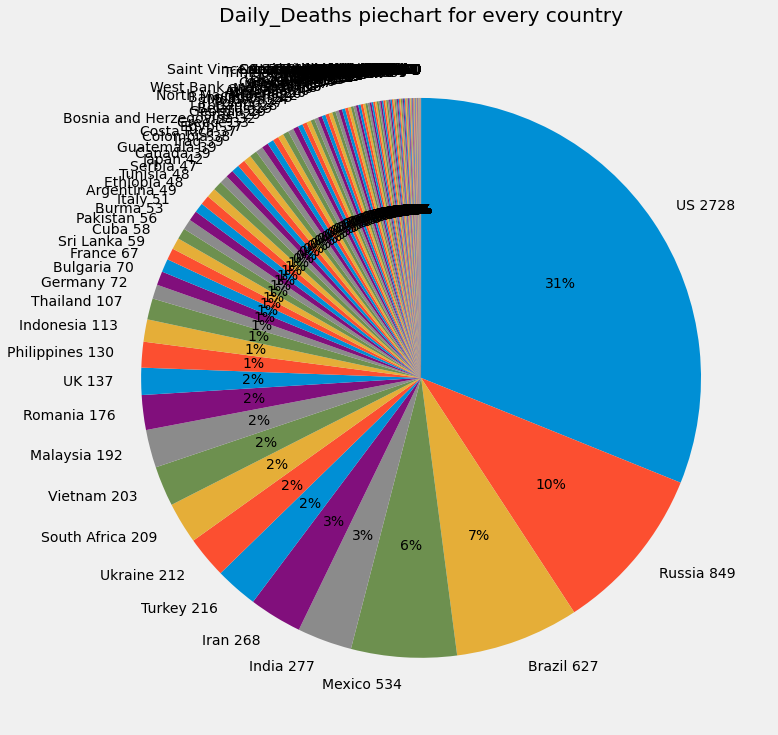

In [37]:
piechart('Daily_Deaths')

In [38]:
print('Today\'s Date: ', dt.datetime.now().date())

Today's Date:  2021-10-01


In [39]:
# Total estimated Cases: 
LastDay_DF.loc['World'].Deaths/mortality

956590000.0

<p>Per Capita deaths are included in this  <a href="https://www.statista.com/statistics/1104709/coronavirus-deaths-worldwide-per-million-inhabitants/" rel="nofollow">Statista</a></p>

In [40]:
!git add .
!git commit -m "`date` update"
!git push origin master

The file will have its original line endings in your working directory


[master 46d4427] `date` update
 1 file changed, 59102 insertions(+), 117 deletions(-)


To https://github.com/Arrowheadahp/COVID-19.git
   0de74cf..46d4427  master -> master
